# Logistic Regression

### Output variable -> y
### y -> Whether the client has subscribed a term deposit or not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
bank = pd.read_csv("C:\\Users\\User\\Documents\\Datascience_Assignments\\Assignment 6 (Logistic regression)\\bank-full.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
bank = bank.drop(['age'], axis=1)
bank = bank.drop(['job'], axis = 1)
bank = bank.drop(['marital'], axis=1)
bank = bank.drop(['education'], axis=1)
bank = bank.drop(['contact'], axis=1)
bank = bank.drop(['day'], axis=1)
bank = bank.drop(['month'], axis=1)
bank

,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,no,2143,yes,no,261,1,-1,0,unknown,no
1,no,29,yes,no,151,1,-1,0,unknown,no
2,no,2,yes,yes,76,1,-1,0,unknown,no
3,no,1506,yes,no,92,1,-1,0,unknown,no
4,no,1,no,no,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,no,825,no,no,977,3,-1,0,unknown,yes
45207,no,1729,no,no,456,2,-1,0,unknown,yes
45208,no,5715,no,no,1127,5,184,3,success,yes
45209,no,668,no,no,508,4,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   default   45211 non-null  object
 1   balance   45211 non-null  int64 
 2   housing   45211 non-null  object
 3   loan      45211 non-null  object
 4   duration  45211 non-null  int64 
 5   campaign  45211 non-null  int64 
 6   pdays     45211 non-null  int64 
 7   previous  45211 non-null  int64 
 8   poutcome  45211 non-null  object
 9   y         45211 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.4+ MB


In [5]:
bank.isna().sum()

default     0
balance     0
housing     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
y           0
dtype: int64

In [6]:
bank1 = pd.get_dummies(bank, columns = ['poutcome'])
bank1

,default,balance,housing,loan,duration,campaign,pdays,previous,y,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,2143,yes,no,261,1,-1,0,no,0,0,0,1
1,no,29,yes,no,151,1,-1,0,no,0,0,0,1
2,no,2,yes,yes,76,1,-1,0,no,0,0,0,1
3,no,1506,yes,no,92,1,-1,0,no,0,0,0,1
4,no,1,no,no,198,1,-1,0,no,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,no,825,no,no,977,3,-1,0,yes,0,0,0,1
45207,no,1729,no,no,456,2,-1,0,yes,0,0,0,1
45208,no,5715,no,no,1127,5,184,3,yes,0,0,1,0
45209,no,668,no,no,508,4,-1,0,no,0,0,0,1


In [7]:
bank1['default'] = np.where(bank1['default'].str.contains("yes"), 1, 0)
bank1['housing'] = np.where(bank1['housing'].str.contains("yes"), 1, 0)
bank1['loan'] = np.where(bank1['loan'].str.contains("yes"), 1, 0)
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)
bank1

,default,balance,housing,loan,duration,campaign,pdays,previous,y,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,2143,1,0,261,1,-1,0,0,0,0,0,1
1,0,29,1,0,151,1,-1,0,0,0,0,0,1
2,0,2,1,1,76,1,-1,0,0,0,0,0,1
3,0,1506,1,0,92,1,-1,0,0,0,0,0,1
4,0,1,0,0,198,1,-1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,825,0,0,977,3,-1,0,1,0,0,0,1
45207,0,1729,0,0,456,2,-1,0,1,0,0,0,1
45208,0,5715,0,0,1127,5,184,3,1,0,0,1,0
45209,0,668,0,0,508,4,-1,0,0,0,0,0,1


## Build A Model 

In [8]:
x = pd.concat([bank1.iloc[:,0:8],bank1.iloc[:,9:]], axis = 1)
y = pd.concat([bank1.iloc[:,8]], axis = 1)

### Logistic Regression Model

In [9]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Predictions

In [10]:
y_pre = classifier.predict(x)
y_pred = pd.DataFrame({'y_pred': y_pre})
y_pred

,y_pred
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,0
45208,1
45209,0


In [11]:
y_pred_df = pd.concat([y ,y_pred], axis = 1)
y_pred_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


## Testing Model Accuracy

### Confusion Matrix for the model accuracy

In [12]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39065,   857],
       [ 3782,  1507]], dtype=int64)

In [13]:
(39065+1507)/(39065+857+3782+1507)

0.897392227555241

#### The Model accuracy is 89.74%

In [14]:
classifier.predict_proba(x)[:,1] 

array([0.03524639, 0.02155002, 0.00960058, ..., 0.97515274, 0.2098514 ,
       0.60814067])

### ROC Curve plotting and finding AUC value

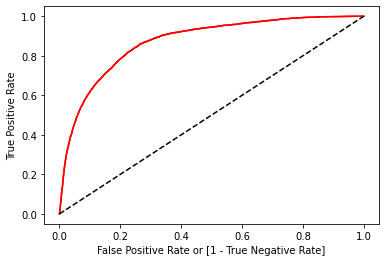

In [15]:
fpr,tpr,thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)
plt.plot(fpr,tpr,color = 'red')
plt.plot(fpr,tpr,color = 'red',label = 'logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [16]:
print('auc accuracy:',auc)

auc accuracy: 0.6317320642335178
